## Import libraries


In [8]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import re
#nltk.download('punkt')
from nltk.tokenize import word_tokenize  
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sc
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances as p_dist
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity as cs

In [1]:
!pip install wrapt --upgrade --ignore-installed
!pip install tensorflow

## Explore data

In [10]:
#pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/Gunisha Chaturvedi/Dropbox/My PC (LAPTOP-1CT80JS5)/Documents/minor/WDIEXCEL2.csv")
#df.head()

In [3]:
print("Shape:",df.shape)

#get unique indicator values
indi_unique = len(list(df.Indicator_Name.unique()))
print("Unique indicators:",indi_unique)

#get unique indicator names
country_unique = len(list(df.Country_Name.unique()))
print("Unique countries:",country_unique)

#frequency of each unique indicator
print("Frequency of each indicator:",df['Indicator_Name'].value_counts())

Shape: (132948, 65)
Unique indicators: 1440
Unique countries: 133
Frequency of each indicator: Agricultural methane emissions (thousand metric tons of CO2 equivalent)                                                   133
Rural population                                                                                                          133
Renewable electricity output (% of total electricity output)                                                              133
Population, total                                                                                                         133
Rural population (% of total population)                                                                                  133
People practicing open defecation (% of population)                                                                       133
Land area (sq. km)                                                                                                        133
Nitrous oxide emissions

### It can be concluded that the distribution of indicators is uneven because some rows have been removed from the original dataset as a part of cleaning.

## Clean data 

In [3]:
#check for rows which have null values for all years 
df1=df[df.loc[:,'1960':'2020'].isnull().all(axis=1)]

#get column wise sum of null values
print(df.isnull().sum().sort_values(ascending=False))

#remove those rows
df.drop(list(df1.index),inplace=True)
print(df.shape)
df.to_csv('C:/Users/hp1/Documents/minor/WDIEXCEL2.csv')

In [11]:
def clean_data(df_new):
    stop_words = set(stopwords.words('english'))
    for i in range(0,df_new.size):
        df_new[i]=re.sub('\(.*?\)',"",df_new[i])        #remove content within brackets
        df_new[i] = re.sub(r'[^\w\s]',"", df_new[i])    #remove punctuations
        df_new[i]= re.sub('\d',"",df_new[i])           #remove numbers
        word_tokens = word_tokenize(df_new[i])
        df_new[i]=" ".join(filter(lambda x: x not in stop_words , word_tokens))   #remove stop words
    return df_new

In [12]:
unique_indicators = df.Indicator_Name.unique()
unique_indicators = clean_data (unique_indicators)
unique_indicators

array(['Access clean fuels technologies cooking', 'Access electricity',
       'Access electricity rural', ..., 'Net ODA provided total',
       'Net primary income', 'Female genital mutilation prevalence'],
      dtype=object)

### Trying word2vec and doc2vec on data

In [3]:
text_data = unique_indicators.tolist()

In [4]:
def convert (text_data):
    for i in range (0,len(text_data)):
        text_data[i] = text_data[i].split()
    return text_data
text_data = convert (text_data)

In [8]:
model = Word2Vec(text_data, min_count=1, size=4)

In [9]:
model.save('model1')

In [65]:
len(model.wv.vocab)

1127

In [14]:
model.wv.most_similar ('government')

[('Suicide', 0.9895569086074829),
 ('documentary', 0.9814968109130859),
 ('Survival', 0.9715716242790222),
 ('UNRWA', 0.9706627726554871),
 ('loans', 0.968593955039978),
 ('Imports', 0.9677640199661255),
 ('Gross', 0.957078218460083),
 ('shipments', 0.9545134902000427),
 ('Market', 0.9509927034378052),
 ('food', 0.9504662752151489)]

In [12]:
model.wv['Access']

array([ 0.064179  ,  0.03314259, -0.00698101, -0.02683746], dtype=float32)

In [6]:
data= unique_indicators
tagged_data = [TaggedDocument(words=word_tokenize(d.lower()), tags=[str(i)]) for i, d in enumerate(data)]

In [7]:
print (tagged_data)

[TaggedDocument(words=['access', 'clean', 'fuels', 'technologies', 'cooking'], tags=['0']), TaggedDocument(words=['access', 'electricity'], tags=['1']), TaggedDocument(words=['access', 'electricity', 'rural'], tags=['2']), TaggedDocument(words=['access', 'electricity', 'urban'], tags=['3']), TaggedDocument(words=['account', 'ownership', 'financial', 'institution', 'mobilemoneyservice', 'provider'], tags=['4']), TaggedDocument(words=['account', 'ownership', 'financial', 'institution', 'mobilemoneyservice', 'provider', 'female'], tags=['5']), TaggedDocument(words=['account', 'ownership', 'financial', 'institution', 'mobilemoneyservice', 'provider', 'male'], tags=['6']), TaggedDocument(words=['account', 'ownership', 'financial', 'institution', 'mobilemoneyservice', 'provider', 'older', 'adults'], tags=['7']), TaggedDocument(words=['account', 'ownership', 'financial', 'institution', 'mobilemoneyservice', 'provider', 'poorest'], tags=['8']), TaggedDocument(words=['account', 'ownership', 'fi

In [8]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\Users\Gunisha Chaturvedi\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


C:\Users\Gunisha Chaturvedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [13]:
model= Doc2Vec.load("d2v.model")

In [4]:
model.wv.vocab
#model.n_similarity (unique_indicators[2].lower(), unique_indicators[3].lower())

{'access': <gensim.models.keyedvectors.Vocab at 0x1c5f2658ef0>,
 'clean': <gensim.models.keyedvectors.Vocab at 0x1c5f2658fd0>,
 'fuels': <gensim.models.keyedvectors.Vocab at 0x1c5f266c080>,
 'technologies': <gensim.models.keyedvectors.Vocab at 0x1c5f266c0b8>,
 'cooking': <gensim.models.keyedvectors.Vocab at 0x1c5f266c128>,
 'electricity': <gensim.models.keyedvectors.Vocab at 0x1c5f266c160>,
 'rural': <gensim.models.keyedvectors.Vocab at 0x1c5f266c1d0>,
 'urban': <gensim.models.keyedvectors.Vocab at 0x1c5f266c240>,
 'account': <gensim.models.keyedvectors.Vocab at 0x1c5f266c2b0>,
 'ownership': <gensim.models.keyedvectors.Vocab at 0x1c5f266c2e8>,
 'financial': <gensim.models.keyedvectors.Vocab at 0x1c5f266c320>,
 'institution': <gensim.models.keyedvectors.Vocab at 0x1c5f266c358>,
 'mobilemoneyservice': <gensim.models.keyedvectors.Vocab at 0x1c5f266c390>,
 'provider': <gensim.models.keyedvectors.Vocab at 0x1c5f266c3c8>,
 'female': <gensim.models.keyedvectors.Vocab at 0x1c5f266c438>,
 'male

In [17]:
d1 = model.infer_vector (word_tokenize(unique_indicators[0]))
d2 = model.infer_vector (word_tokenize(unique_indicators[1]))

In [18]:
d1

array([ 6.7383754e-03,  1.6278412e-02, -3.2776251e-02,  1.6591229e-02,
        2.3905771e-02, -2.1314067e-03,  6.3323416e-03,  9.2009306e-03,
        1.8139169e-02, -8.7269256e-03,  1.4987248e-02, -1.8265320e-02,
        1.8993242e-02, -1.9183127e-02, -1.1061711e-02, -6.7447755e-03,
       -1.3427376e-02,  1.9758008e-06, -8.3829630e-03, -2.5613601e-03],
      dtype=float32)

In [15]:
unique_indicators[0]

'Access clean fuels technologies cooking'

In [21]:
similar_doc = model.docvecs.most_similar ([d1])
print (similar_doc)
#test_data = word_tokenize("sun is moon")
#print(model.infer_vector(test_data))

[('61', 0.4966639280319214), ('965', 0.4620206952095032), ('1073', 0.4557342827320099), ('1116', 0.44985610246658325), ('1035', 0.43904632329940796), ('1101', 0.43403688073158264), ('846', 0.4299074411392212), ('1180', 0.4223487079143524), ('174', 0.40999358892440796), ('1187', 0.4042547643184662)]


## Vectorisation

In [6]:
#apply tf-idf vectorization

v = tfidf()
v1 = v.fit_transform(unique_indicators)
arr = v1.toarray()

## PCA and k-means

In [7]:
pca = PCA (n_components=2)
pcom = pca.fit_transform(arr)
principaldf = pd.DataFrame(data = pcom, columns = ['x', 'y'])
principaldf.head()

,x,y
0,-0.053093,-0.003928
1,-0.058078,-0.005259
2,-0.052967,-0.004277
3,-0.051594,-0.003552
4,-0.067034,0.024567


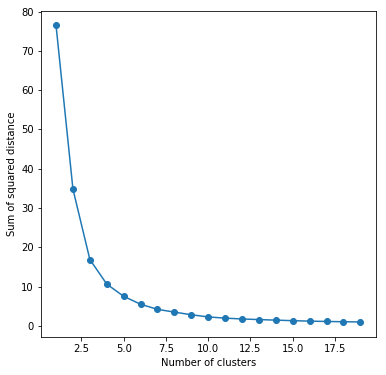

In [8]:
#implement elbow method

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(principaldf)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

In [9]:
#apply k-means

Kmean = KMeans (n_clusters = 5,random_state=0)
cluster=Kmean.fit_predict (principaldf)

In [12]:
cluster = pd.Series(cluster)

In [22]:
df2 = pd.concat([df.loc[0:1439,'Indicator_Name'], cluster], axis=1)

In [24]:
df2.tail()

,Indicator_Name,0
1435,"Personal remittances, received (current US$)",4
1436,"Personal transfers, receipts (BoP, current US$)",4
1437,"Physicians (per 1,000 people)",4
1438,"Plant species (higher), threatened",4
1439,"PM2.5 air pollution, mean annual exposure (mic...",3


In [28]:
df2.to_csv('C:\\Users\\Gunisha Chaturvedi\\Dropbox\\My PC (LAPTOP-1CT80JS5)\\Documents\\minor\\newclusters.csv')

In [25]:
new_df = pd.concat([principaldf,cluster], axis=1)
new_df.rename(columns={0:'Cluster'},inplace=True)
new_df.head()

,x,y,Cluster
0,-0.053093,-0.003928,0
1,-0.058078,-0.005259,0
2,-0.052967,-0.004277,0
3,-0.051594,-0.003552,0
4,-0.067034,0.024567,0


In [30]:
cluster.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    4
17    4
18    4
19    4
dtype: int32

In [47]:
unique_indicators_df = pd.DataFrame (unique_indicators, columns= ['Indicator_Name'])

In [52]:
df_final = pd.concat ([unique_indicators_df, new_df], axis=1)

In [55]:
df_final.head()

,Indicator_Name,x,y,Cluster
0,Access clean fuels technologies cooking,-0.053096,-0.003290,1
1,Access electricity,-0.058083,-0.004177,1
2,Access electricity rural,-0.052971,-0.002681,1
3,Access electricity urban,-0.051598,-0.001911,1
4,Account ownership financial institution mobile...,-0.067046,0.026517,1


## Evaluation metrics- Dunn Index and Silhouette Score

In [58]:
#code to calculate numerator
#calculate pairwise distances between cluster centers

centers = Kmean.cluster_centers_
d_mat = p_dist(centers, metric= 'euclidean')

#remove duplicates and get min distance
d_mat_unique = set(d_mat.flatten()) 
d_mat_unique.remove(0)
inter_cluster_dist = min(d_mat_unique)

In [60]:
#code to calculate denominator

dist_list = []
n_clusters = 5
for j in range(0,n_clusters):
    cluster_points = df_final[['x','y']][df_final['Cluster']== j]
    dist_mat = p_dist (cluster_points)
    dist_mat_unique = set(dist_mat.flatten()) 
    max1 = max(dist_mat_unique)
    dist_list.append (max1)

intra_cluster_dist = max(dist_list)
d_index = (inter_cluster_dist/intra_cluster_dist)
print (d_index)

0.39687119734012266


In [61]:
#calculate silhouette score
print(sc(principaldf,cluster))

0.6411448775523271


## Visualize clusters

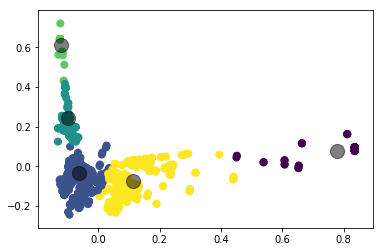

In [62]:
plt.scatter(df_final['x'], df_final['y'], c=cluster, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Visualisations

In [ ]:
#stacked bar graph

df1=df.where((df['Indicator_Code']=='SL.TLF.0714.WK.ZS') | (df['Indicator_Code']=='SL.TLF.0714.SW.ZS'))
df1.dropna(how='all',inplace=True)
print(df1.shape)
print(df1.head(10))
df1.to_csv('C:/Users/hp1/Documents/minor/education1.csv')